<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/J-TKim/HandsOn_machinelearning2/blob/master/09_unsupervised_learning.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [1]:
import numpy as np
import os

random_seed = 42
np.random.seed(random_seed)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 9.1 군집

## 분류 vs 군집

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

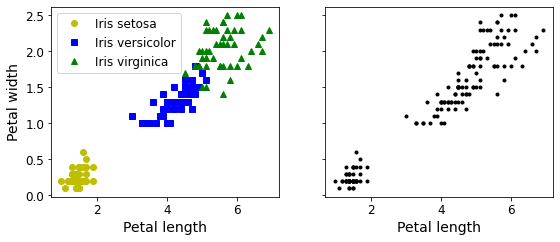

In [4]:
plt.figure(figsize=(9, 3.5))

# label에 따라서 따로 plot
plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], 'yo', label='Iris setosa') #
plt.plot(X[y==1, 2], X[y==1, 3], 'bs', label='Iris versicolor')
plt.plot(X[y==2, 2], X[y==2, 3], 'g^', label='Iris virginica')
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(fontsize=12)

# label에 상관없이 한번에 plot
plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c='k', marker='.')
plt.xlabel('Petal length', fontsize=14)
plt.tick_params(labelleft=False)

# X[2] : 꽃잎 길이, X[3] : 꽃잎 너비
plt.show()

가우시안 혼합 모델을 이용해 위처럼 나누기

In [5]:
from sklearn.mixture import GaussianMixture

In [6]:
y_pred = GaussianMixture(n_components=3, random_state=random_seed).fit(X).predict(X)
mapping_index = [np.argmax(np.bincount(y_pred[n:n+50])) for n in range(0, 150, 50)]
mapping = {mapping_index[i]:i for i in [0, 1, 2]}
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

가우시안 혼합 모델의 성능 확인

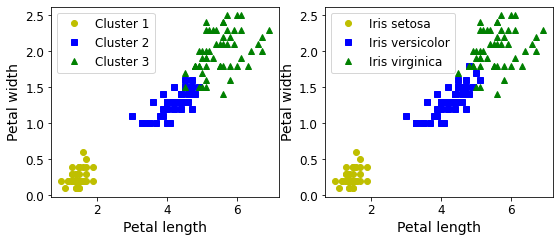

In [7]:
plt.figure(figsize=(9, 3.5))

# 가우시안 혼합 모델
plt.subplot(121)
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], 'yo', label='Cluster 1')
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], 'bs', label='Cluster 2')
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], 'g^', label='Cluster 3')
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(fontsize=12)

# 실제 데이터
plt.subplot(122)
plt.plot(X[y==0, 2], X[y==0, 3], 'yo', label='Iris setosa') #
plt.plot(X[y==1, 2], X[y==1, 3], 'bs', label='Iris versicolor')
plt.plot(X[y==2, 2], X[y==2, 3], 'g^', label='Iris virginica')
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(fontsize=12)

plt.show()

In [8]:
len(y)

150

In [9]:
np.sum(y_pred==y)

145

In [10]:
np.sum(y_pred==y) / len(y_pred)

0.9666666666666667

### 9.1.1 k-평균

In [11]:
from sklearn.datasets import make_blobs

In [12]:
blob_centers = np.array(
    [[0.2, 2.3],
    [-1.5, 2.3],
    [-2.8, 1.8],
    [-2.8, 2.8],
    [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [13]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                 cluster_std=blob_std, random_state=7)

In [14]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14, rotation=0)

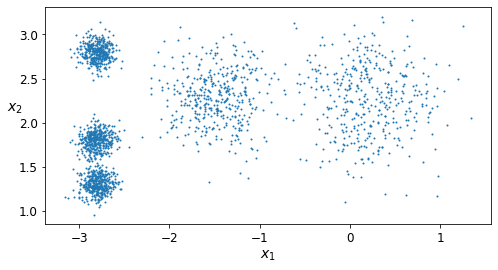

In [15]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [16]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=random_seed)
y_pred = kmeans.fit_predict(X)

In [17]:
y_pred

array([4, 1, 0, ..., 3, 0, 1], dtype=int32)

In [18]:
y_pred is kmeans.labels_

True

In [19]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [20]:
kmeans.labels_ # 이 레이블은 샘플에 할당한 클러스터의 인덱스

array([4, 1, 0, ..., 3, 0, 1], dtype=int32)

In [21]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3], dtype=int32)

In [22]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='o', s=30, linewidths=8,
               color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=50,
               color=cross_color, zorder=11, alpha=1)
    
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap='Pastel2')
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    
    if show_xlabels:
        plt.xlabel('$x_1$', fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel('$x_2$', fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

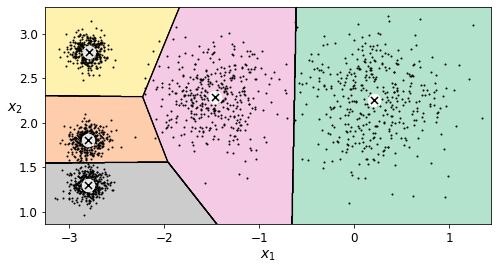

In [23]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

하드 군집 vs 소프트 군집

In [24]:
# 각 센트로이드 까지의 거리 측정
kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

In [25]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

k-means 알고리즘

In [26]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm='full', max_iter=1, random_state=9)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm='full', max_iter=2, random_state=9)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm='full', max_iter=3, random_state=9)
          
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=9,
       tol=0.0001, verbose=0)

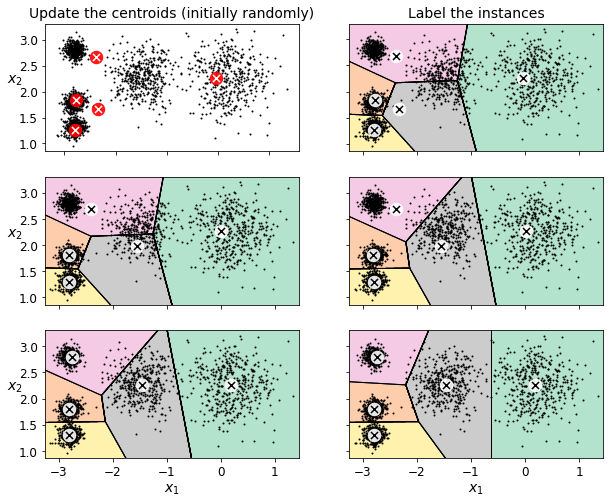

In [27]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel('$x_2$', fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title('Update the centroids (initially randomly)', fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title('Label the instances', fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

k-means 변동성

운 나쁜 센트로이드 초기화 때문에 만들어진 최적이 아닌 클러스터링

In [28]:
def plot_cluster_comparison(cluster1, cluster2, X, title1=None, title2=None):
  cluster1.fit(X)
  cluster2.fit(X)

  plt.figure(figsize=(10, 3.2))

  plt.subplot(121)
  plot_decision_boundaries(cluster1, X)
  if title1:
    plt.title(title1, fontsize=14)
  
  plt.subplot(122)
  plot_decision_boundaries(cluster2, X, show_ylabels=False)
  if title2:
    plt.title(title2, fontsize=14)

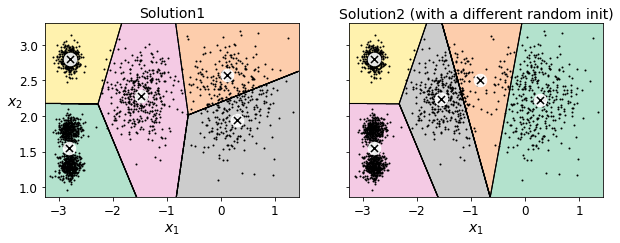

In [29]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init='random', n_init=1,
                          algorithm='full', random_state=42)
kmeans_rnd_init2 = KMeans(n_clusters=5, init='random', n_init=1,
                          algorithm='full', random_state=51)

plot_cluster_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                        'Solution1', 'Solution2 (with a different random init)')

plt.show()

이너셔

In [30]:
kmeans.inertia_

211.5985372581684

In [31]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

In [32]:
kmeans.score(X)

-211.59853725816856

다중 초기화

In [33]:
kmeans_rnd_init1.inertia_

219.48142731436425

In [34]:
kmeans_rnd_init2.inertia_

236.6351925965028

kmeans.inertia_ 보다 이너셔가 높음 (더 나쁨)

In [35]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init='random', n_init=10,
                             algorithm='full', random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=11,
       tol=0.0001, verbose=0)

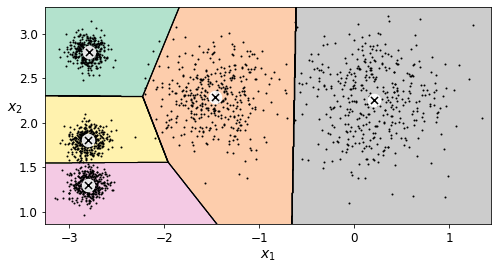

In [36]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

k-means++

In [37]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

k-means 속도 개선   
to use Elkan k-means : set algorith='elkan'

In [39]:
%timeit -n 50 KMeans(algorithm='elkan').fit(X)

50 loops, best of 3: 91.5 ms per loop


In [40]:
%timeit -n 50 KMeans(algorithm='full').fit(X)

50 loops, best of 3: 123 ms per loop


minibatch k-means


In [41]:
from sklearn.cluster import MiniBatchKMeans

In [42]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [43]:
minibatch_kmeans.inertia_

211.93186531476775

데이터셋이 메모리에 다 들어가지 않으면 memmap클래스를 사용

In [44]:
import urllib.request
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist['data'], mnist['target'], random_state=42
)

memmap에 데이터를 기록

In [46]:
filename = 'my_mnist.data'
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [47]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

데이터가 너무 커서 memmap를 사용할 수 없을 때는 아래와 같이 배치를 로드하는 함수를 만들어 해결(실전에서는 디스크에서 데이터를 로드)

In [48]:
def load_next_batch(batch_size):
  return X[np.random.choice(len(X), batch_size, replace=False)]

In [49]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500 # K-Means++ 초기화를 위해 충분한 데이터 전달
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
  minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
  X_init = load_next_batch(init_size)
  minibatch_kmeans.partial_fit(X_init)

  minibatch_kmeans.sum_inertia_ = 0
  for iteration in range(n_iterations):
    X_batch = load_next_batch(batch_size)
    minibatch_kmeans.partial_fit(X_batch)
    if iteration >= n_iterations - evaluate_on_last_n_iters:
      minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_
  
  if (best_kmeans is None or
      minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
    best_kmeans = minibatch_kmeans

In [50]:
best_kmeans.score(X)

-211.75452293405596

미니배치가 훨씬 더 빠르지만, 성능은 더 낮은(이니셔가 더 높은)경우가 많다

In [51]:
%timeit KMeans(n_clusters=5).fit(X)

10 loops, best of 3: 53.9 ms per loop


In [52]:
%timeit MiniBatchKMeans(n_clusters=5).fit(X)

10 loops, best of 3: 28.4 ms per loop


In [53]:
from timeit import timeit

In [54]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
  kmeans_ = KMeans(n_clusters=k, random_state=42)
  minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
  print('\r{}/{}'.format(k, 100), end='')
  times[k-1, 0] = timeit('kmeans_.fit(X)', number=10, globals=globals())
  times[k-1, 1] = timeit('minibatch_kmeans.fit(X)', number=10, globals=globals())
  inertias[k-1, 0] = kmeans_.inertia_
  inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

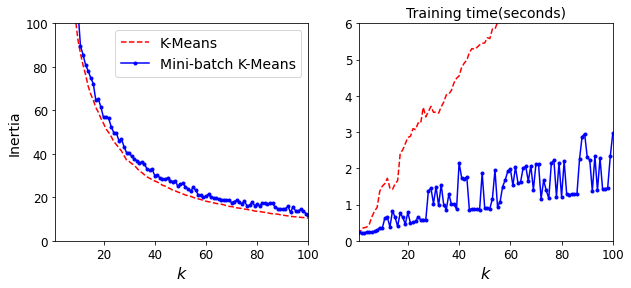

In [55]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], 'r--', label='K-Means')
plt.plot(range(1, 101), inertias[:, 1], 'b.-', label='Mini-batch K-Means')
plt.xlabel('$k$', fontsize=16)
plt.ylabel('Inertia', fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], 'r--', label='K-Means')
plt.plot(range(1, 101), times[:, 1], 'b.-', label='Mini-batch K-Means')
plt.xlabel('$k$', fontsize=16)
plt.title('Training time(seconds)', fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

최적의 클러스터 개수 찾기

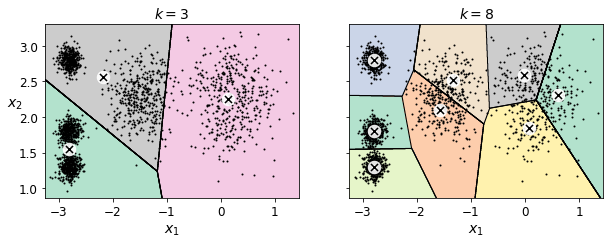

In [56]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_cluster_comparison(kmeans_k3, kmeans_k8, X,'$k=3$', '$k=8$')
plt.show()

In [57]:
kmeans_k3.inertia_

653.2167190021553

In [58]:
kmeans_k8.inertia_

118.41983763508077

두 모델 모두 좋아보이지는 않지만, k가 증가할수록 이니셔가 줄어들기 때문에 단순히 이니셔 기준으로 k를 선택할 순 없다

In [59]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

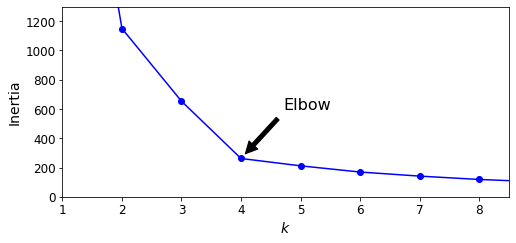

In [60]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([1, 8.5, 0, 1300])
plt.show()

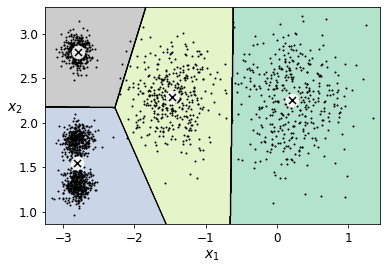

In [61]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

최선의 클러스터 개수를 위한 더 정확한(하지만 계산비용이 더 많이 드는) 실루엣 점수

In [62]:
from sklearn.metrics import silhouette_score

In [63]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [64]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

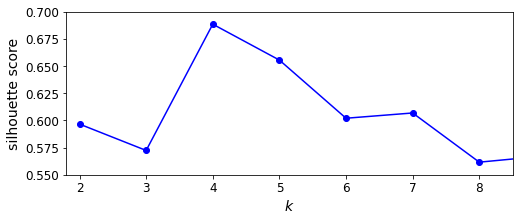

In [65]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('silhouette score', fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

여전히 k=4가 가장 좋은 점수를 보여주지만 k=5역시 좋은 점수를 보여줌

모든 샘플의 실루엣 계수를 할당된 클러스터와 계수값을 정렬하여 그리면 더 많은 정보를 얻을 수 있다.   

이를 *실루엣 다이어그램*이라고 한다.

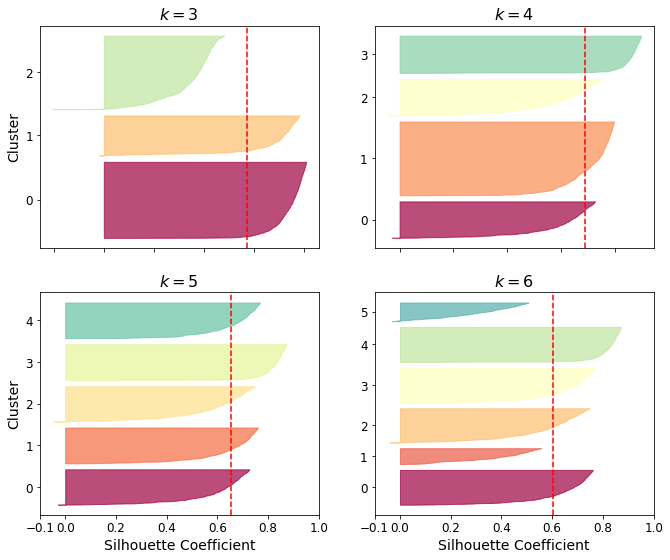

In [66]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter


plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
  plt.subplot(2, 2, k-2)

  y_pred = kmeans_per_k[k - 1].labels_
  silhouette_coefficients = silhouette_samples(X, y_pred)

  padding = len(X) // 30
  pos = padding
  ticks = []
  for i in range(k):
    coeffs = silhouette_coefficients[y_pred == i]
    coeffs.sort()

    color = mpl.cm.Spectral(i / k)
    plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ticks.append(pos + len(coeffs) // 2)
    pos += len(coeffs) + padding

  plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
  plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
  if k in (3, 5):
    plt.ylabel('Cluster')
  
  if k in (5, 6):
    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel('Silhouette Coefficient')
  else:
    plt.tick_params(labelbottom=False)

  plt.axvline(x=silhouette_scores[k - 2], color='red', linestyle='--')
  plt.title('$k={}$'.format(k), fontsize=16)

plt.show()

비슷한 사이즈들을 가지고있는 k=5을 선택하는게 가장 좋음

### 9.1.2 K-Means의 한계

In [67]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

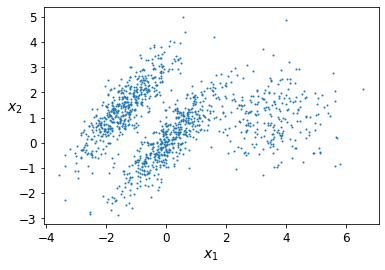

In [68]:
plot_clusters(X)

In [69]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, -0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X) 
kmeans_bad.fit(X)             

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

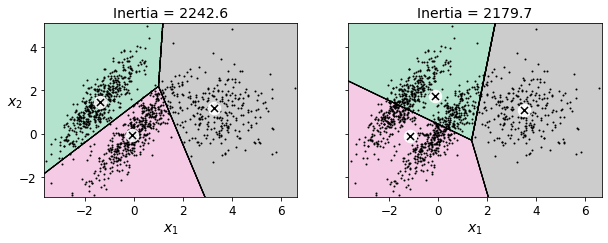

In [70]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title('Inertia = {:.1f}'.format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title('Inertia = {:.1f}'.format(kmeans_bad.inertia_), fontsize=14)

plt.show()

이런 타원형 클러스터에서는 가우시안 혼합 모델이 잘 작동한다.

### 9.1.3 군집을 이용한 이미지 분할

In [71]:
# 무당벌레 이미지 다운로드
images_path = os.path.join(PROJECT_ROOT_DIR, 'images', 'unsupervised_learning')
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = 'ladybug.png'
print('Downloading', filename)
url = DOWNLOAD_ROOT + 'images/unsupervised_learning/' + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7f98ac87f6d8>)

In [72]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [73]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [74]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
  kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
  segmented_img = kmeans.cluster_centers_[kmeans.labels_]
  segmented_imgs.append(segmented_img.reshape(image.shape))

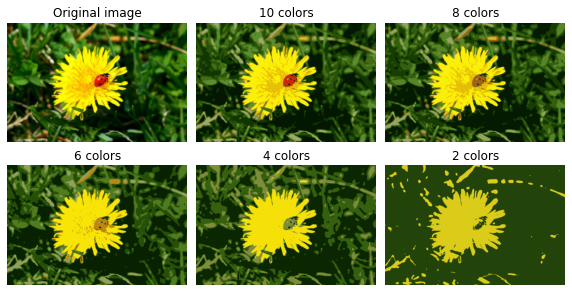

In [75]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title('Original image')
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
  plt.subplot(232 + idx)
  plt.imshow(segmented_imgs[idx])
  plt.title('{} colors'.format(n_clusters))
  plt.axis('off')

plt.show()

### 9.1.4 군집을 사용한 전처리

In [76]:
from sklearn.datasets import load_digits

In [77]:
X_digits, y_digits = load_digits(return_X_y=True)

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
log_reg.score(X_test, y_test)

0.9688888888888889

In [83]:
from sklearn.pipeline import Pipeline

In [84]:
pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50, random_state=42)),
    ('log_reg', LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [85]:
pipeline.score(X_test, y_test)

0.98

In [86]:
1 - (1 - pipeline.score(X_test, y_test)) / (1 - log_reg.score(X_test, y_test))

0.3571428571428561

36%까지 오차율을 줄임

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 27.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                      

In [89]:
grid_clf.best_params_

{'kmeans__n_clusters': 57}

In [90]:
grid_clf.score(X_test, y_test)

0.98